# All in one - ExperimentalVariogram class

In this exercise you will learn how to analyze your spatial dataset all at once. Your job will be to create the `ExperimentalVariogram` object and compare different metrics: variance, covariance and semivariance.

## Prerequisites

- **Domain**:
  - understanding what are semivariance and covariance of spatial datasets
- **Package**:
  - installation
- **Programming**:
  - Python basics

## Table of contents

1. Load and visualize input data.
2. Create an omnidirectional (isotropic) `ExperimentalVariogram` object.
3. Get info about the object.
4. Use `plot()` function of the class.
5. Get directional variograms.

In [2]:
import geopandas as gpd
from pyinterpolate import ExperimentalVariogram
import matplotlib.pyplot as plt

In [3]:
VALUE_COL = 'PM2.5'
df = gpd.read_file('data/air_pollution.gpkg', layer='pm2_5')
df.set_index('station_id', inplace=True)

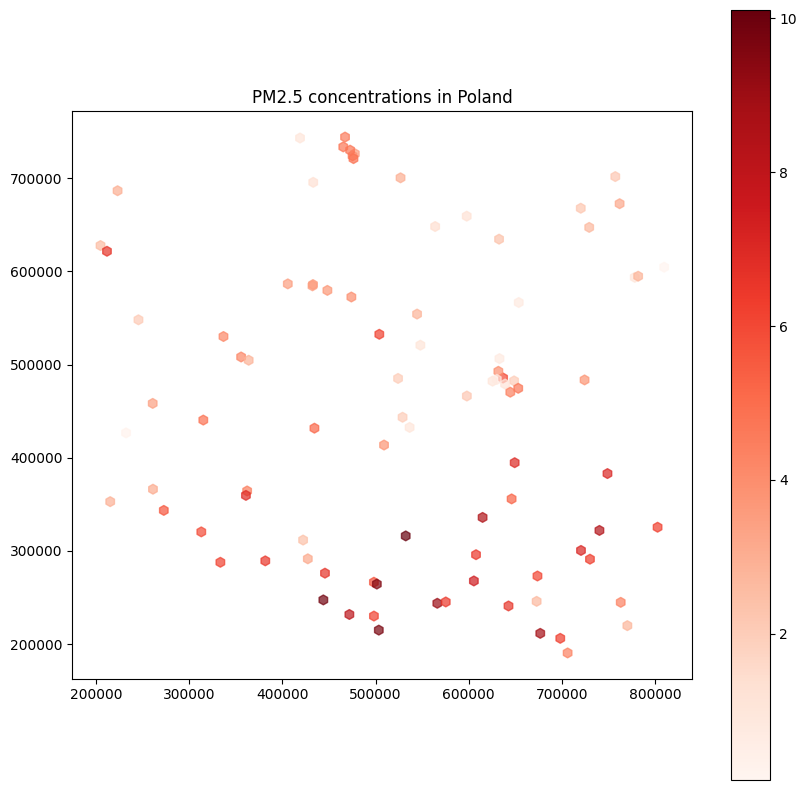

In [4]:
df.plot(figsize=(10, 10), column=VALUE_COL, legend=True, markersize=50, alpha=0.7, marker="h", cmap='Reds')
plt.title('PM2.5 concentrations in Poland')
plt.show()

In [5]:
step_size = 60000  # meters
max_range = 400000  # meters
evar = ExperimentalVariogram(
    ds=df[['geometry', VALUE_COL]],
    step_size=step_size,
    max_range=max_range
)

In [6]:
print(evar)

+----------+--------------------+---------------------+
|   lag    |    semivariance    |      covariance     |
+----------+--------------------+---------------------+
| 60000.0  | 3.0083030145630305 |  3.083277738051624  |
| 120000.0 | 3.6081206418202667 |  3.176538277346763  |
| 180000.0 | 4.546457397647137  |  1.7240869615624361 |
| 240000.0 | 5.734814736057346  |  0.6218667460123264 |
| 300000.0 | 6.706149874796707  | -0.7374624968623684 |
| 360000.0 | 6.865304270506744  | -0.9672869503890729 |
+----------+--------------------+---------------------+


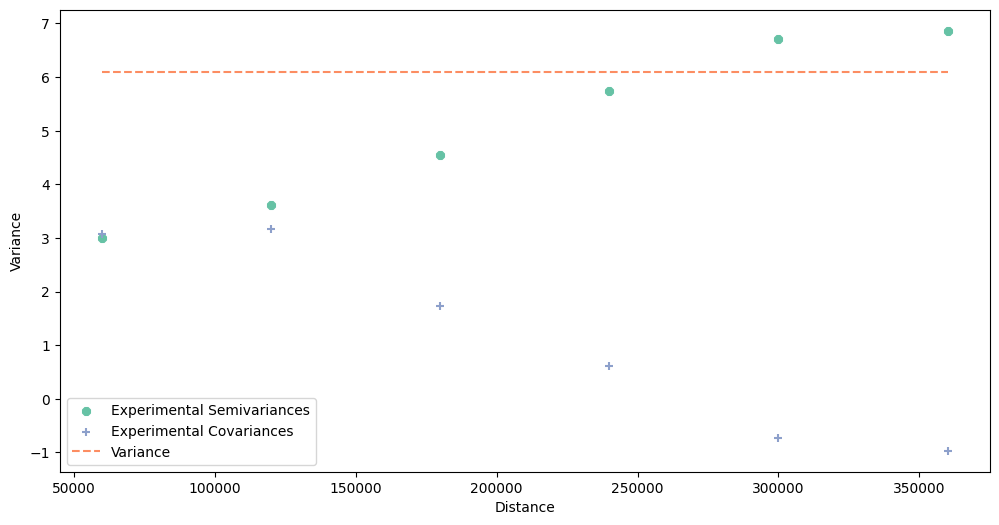

In [7]:
evar.plot()

In [11]:
step_size = 60000  # meters
max_range = 600000  # meters
direction = 15
tolerance = 0.3

dir_exp_var = ExperimentalVariogram(
    ds=df[['geometry', VALUE_COL]],
    step_size=step_size,
    max_range=max_range,
    direction=direction,
    tolerance=tolerance
)

In [12]:
print(dir_exp_var)

+----------+--------------------+--------------------+
|   lag    |    semivariance    |     covariance     |
+----------+--------------------+--------------------+
| 60000.0  | 1.3887550757485296 | 4.046834073810726  |
| 120000.0 | 3.1782088761956047 | 3.4717090480446138 |
| 180000.0 | 3.080000917927103  | 4.096350345569313  |
| 240000.0 | 3.0723193854568707 | 3.6293534102518725 |
| 300000.0 | 3.0525240618326475 | 3.7611940630671885 |
| 360000.0 | 3.7324903276098107 | 2.810137101326647  |
| 420000.0 | 3.803229538949476  | 2.445211199569317  |
| 480000.0 | 4.873165488987691  | 1.2853425339567195 |
| 540000.0 | 4.068769433076887  | 1.443199100553518  |
+----------+--------------------+--------------------+


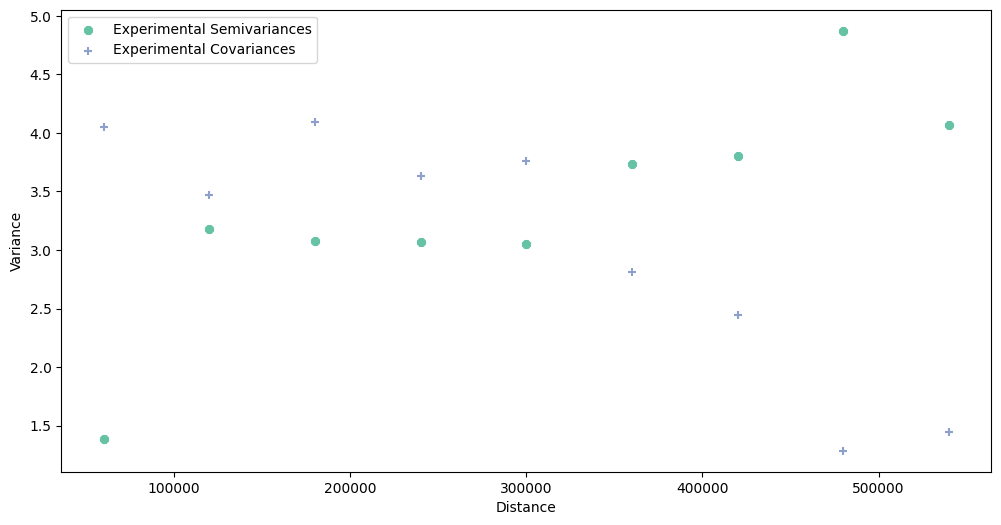

In [14]:
dir_exp_var.plot(variance=False)